# **Analysis and Predicting Bank Marketing campaign**

this project was completed as an individual project for the purpose of practice and fun




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plot

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [3]:
bank = pd.read_csv('bank-additional-full.csv', sep=',')
print(bank.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# **PART1: DATA EXPLORATION**

### 1.1 excluding erroneous data

In [4]:
bank.duplicated().sum()
print(bank.shape[0])

41188


In [5]:
bank['y'] = bank['y'].replace(['no', 'yes'], [0, 1])
bank['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

###1.2 Understand numerical feature

####1.2.1 overview

In [6]:
bank.info()

print(bank.describe(percentiles = [0.1, 0.25, 0.50, 0.75, 0.95]))

(bank=='unknown').sum(axis=0)/bank.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0.000000
job               0.008012
marital           0.001942
education         0.042027
default           0.208726
housing           0.024036
loan              0.024036
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

####1.2.2 Correlation amoung numerical feature

<AxesSubplot:>

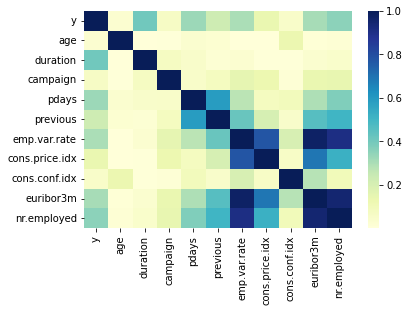

In [7]:
corr = bank[['y', 'age','duration','campaign'
               ,'pdays', 'previous', 'emp.var.rate', 'cons.price.idx' ,'cons.conf.idx', 
               'euribor3m', 'nr.employed']].corr().abs()

sns.heatmap(corr, cmap="YlGnBu")

In [8]:
corr

,y,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,1.000000,0.030399,0.405274,0.066357,0.324914,0.230181,0.298334,0.136211,0.054878,0.307771,0.354536
age,0.030399,1.000000,0.000866,0.004594,0.034369,0.024365,0.000371,0.000857,0.129372,0.010767,0.017521
duration,0.405274,0.000866,1.000000,0.071699,0.047577,0.020640,0.027968,0.005312,0.008173,0.032897,0.044678
campaign,0.066357,0.004594,0.071699,1.000000,0.052584,0.079141,0.150754,0.127836,0.013733,0.135133,0.144012
pdays,0.324914,0.034369,0.047577,0.052584,1.000000,0.587514,0.271004,0.078889,0.091342,0.296899,0.372314
previous,0.230181,0.024365,0.020640,0.079141,0.587514,1.000000,0.420489,0.203130,0.050936,0.454494,0.501122
emp.var.rate,0.298334,0.000371,0.027968,0.150754,0.271004,0.420489,1.000000,0.775334,0.196041,0.972245,0.907246
cons.price.idx,0.136211,0.000857,0.005312,0.127836,0.078889,0.203130,0.775334,1.000000,0.058986,0.688230,0.522452
cons.conf.idx,0.054878,0.129372,0.008173,0.013733,0.091342,0.050936,0.196041,0.058986,1.000000,0.277686,0.101302
euribor3m,0.307771,0.010767,0.032897,0.135133,0.296899,0.454494,0.972245,0.688230,0.277686,1.000000,0.945554


In [9]:
#dropping out highly correlated columns
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)

bank.drop(['euribor3m'], axis=1, inplace = True)

                 y       age  duration  campaign     pdays  previous  \
y              NaN  0.030399  0.405274  0.066357  0.324914  0.230181   
age            NaN       NaN  0.000866  0.004594  0.034369  0.024365   
duration       NaN       NaN       NaN  0.071699  0.047577  0.020640   
campaign       NaN       NaN       NaN       NaN  0.052584  0.079141   
pdays          NaN       NaN       NaN       NaN       NaN  0.587514   
previous       NaN       NaN       NaN       NaN       NaN       NaN   
emp.var.rate   NaN       NaN       NaN       NaN       NaN       NaN   
cons.price.idx NaN       NaN       NaN       NaN       NaN       NaN   
cons.conf.idx  NaN       NaN       NaN       NaN       NaN       NaN   
euribor3m      NaN       NaN       NaN       NaN       NaN       NaN   
nr.employed    NaN       NaN       NaN       NaN       NaN       NaN   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
y                   0.298334        0.136211       0.054878  

<ipython-input-9-f4f0b08db05c>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


##1.3 Distribution of standard categorical feature

####1.3.1 distribution of standard categorical feature

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


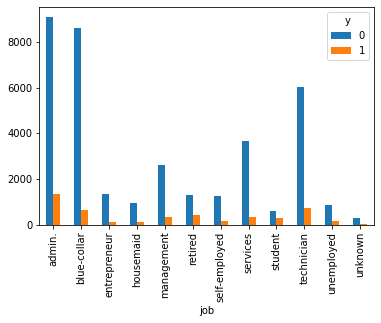

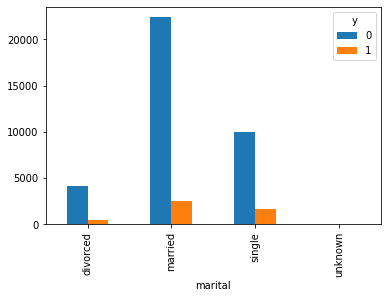

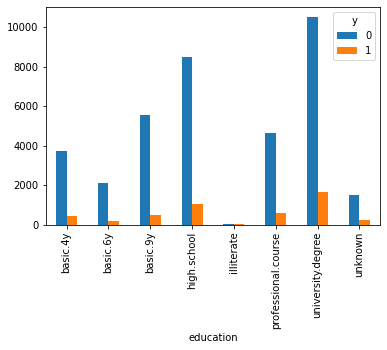

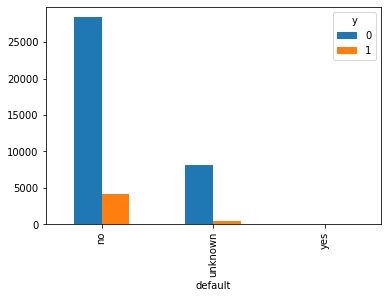

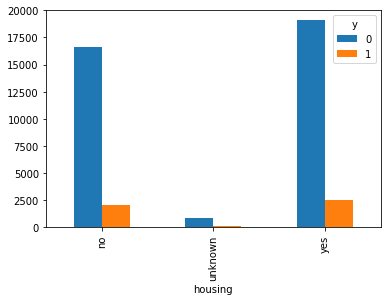

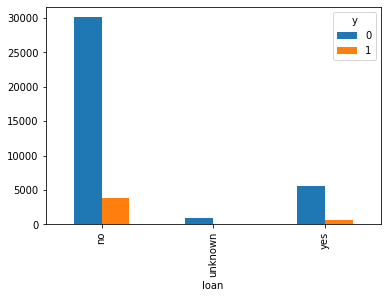

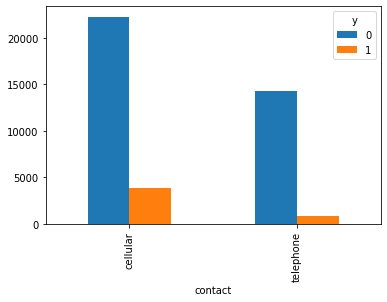

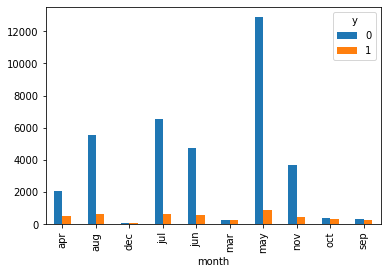

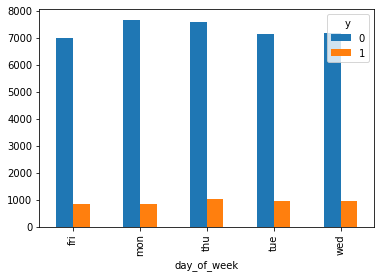

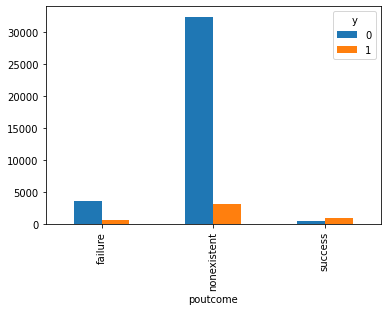

In [10]:
crosstabjob = pd.crosstab(index=bank['job'],columns=bank['y'])
print(crosstabjob.plot.bar())

crosstabmarital = pd.crosstab(index=bank['marital'],columns=bank['y'])
print(crosstabmarital.plot.bar())

crosstabeducation = pd.crosstab(index=bank['education'],columns=bank['y'])
print(crosstabeducation.plot.bar())

crosstabdefault = pd.crosstab(index=bank['default'],columns=bank['y'])
print(crosstabdefault.plot.bar())

crosstabhousing = pd.crosstab(index=bank['housing'],columns=bank['y'])
print(crosstabhousing.plot.bar())

crosstabloan = pd.crosstab(index=bank['loan'],columns=bank['y'])
print(crosstabloan.plot.bar())

crosstabcontact = pd.crosstab(index=bank['contact'],columns=bank['y'])
print(crosstabcontact.plot.bar())

crosstabmonth = pd.crosstab(index=bank['month'],columns=bank['y'])
print(crosstabmonth.plot.bar())

crosstabweek = pd.crosstab(index=bank['day_of_week'],columns=bank['y'])
print(crosstabweek.plot.bar())

crosstabpoutcome = pd.crosstab(index=bank['poutcome'],columns=bank['y'])
print(crosstabpoutcome.plot.bar())

#### 1.3.2 distribution of splited job

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
dtype: int64


<AxesSubplot:>

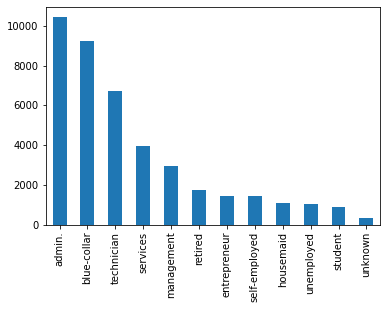

In [11]:
job_split = bank['job'].str.get_dummies(sep=',').sum()
print(job_split.sort_values(ascending=False))

job_split.sort_values(ascending=False).plot.bar()

#试试找到每一个工作的平均duration plot出来

####1.3.3 distribution of education

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
dtype: int64


<AxesSubplot:>

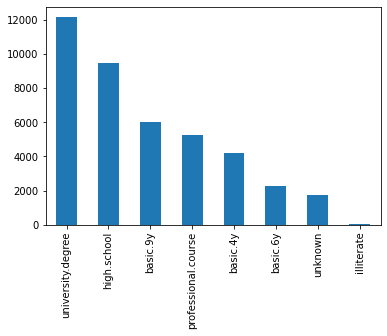

In [12]:
education_split = bank['education'].str.get_dummies(sep=',').sum()
print(education_split.sort_values(ascending=False))

education_split.sort_values(ascending=False).plot.bar()

##Part 2: Feature Preprocessing

###2.1 missing data

In [13]:
bank[['job', 'marital', 'education', 'default', 'housing', 'loan']] = bank[['job', 'marital', 'education', 'default', 'housing', 'loan']].replace('unknown', np.nan)
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
new_bank = bank.apply(lambda x: x.fillna(x.value_counts().index[0]))
new_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

###2.2 categorical variable

categorical variable: 
job, marital, education, default, housing,
loan, contact, month, day_of_week, poutcome

In [15]:
#create dummy variable for all categorical column
d_job = pd.get_dummies(bank['job']).astype(np.int64)
d_marital = pd.get_dummies(bank['marital']).astype(np.int64)
d_education = pd.get_dummies(bank['education']).astype(np.int64)
d_default = pd.get_dummies(bank['default']).astype(np.int64)
d_housing = pd.get_dummies(bank['housing']).astype(np.int64)
d_loan = pd.get_dummies(bank['loan']).astype(np.int64)
d_contact = pd.get_dummies(bank['contact']).astype(np.int64)
d_month = pd.get_dummies(bank['month']).astype(np.int64)
d_dayofweek = pd.get_dummies(bank['day_of_week']).astype(np.int64)
d_poutcome = pd.get_dummies(bank['poutcome']).astype(np.int64)

In [16]:
temp_bank=bank.drop(['job', 'marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], axis=1)

newbank = pd.concat([temp_bank, d_job, d_marital, d_education, d_default, d_housing, d_loan, d_contact, d_month, d_dayofweek, d_poutcome], axis=1)
print(newbank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   duration             41188 non-null  int64  
 2   campaign             41188 non-null  int64  
 3   pdays                41188 non-null  int64  
 4   previous             41188 non-null  int64  
 5   emp.var.rate         41188 non-null  float64
 6   cons.price.idx       41188 non-null  float64
 7   cons.conf.idx        41188 non-null  float64
 8   nr.employed          41188 non-null  int64  
 9   y                    41188 non-null  int64  
 10  admin.               41188 non-null  int64  
 11  blue-collar          41188 non-null  int64  
 12  entrepreneur         41188 non-null  int64  
 13  housemaid            41188 non-null  int64  
 14  management           41188 non-null  int64  
 15  retired              41188 non-null 

###2.3 Feature scaling

In [17]:
scale_lst = ['age','duration','campaign'
               ,'pdays', 'previous', 'emp.var.rate', 'cons.price.idx' ,'cons.conf.idx', 
               'nr.employed']
newbank_sc = newbank.copy()
sc_scale = preprocessing.StandardScaler().fit(newbank_sc[scale_lst])
newbank_sc[scale_lst] = sc_scale.transform(newbank_sc[scale_lst])
newbank_sc.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,...,oct,sep,fri,mon,thu,tue,wed,failure,nonexistent,success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.332252,0,...,0,0,0,1,0,0,0,0,1,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.332252,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.332252,0,...,0,0,0,1,0,0,0,0,1,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.332252,0,...,0,0,0,1,0,0,0,0,1,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.332252,0,...,0,0,0,1,0,0,0,0,1,0


##Part 3: Model Training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score #not used
from math import sqrt


train, test = train_test_split(newbank_sc, test_size=0.15, random_state = 3)
model_train_x = train.drop(['y'], axis = 1)
model_test_x = test.drop(['y'], axis = 1)
model_train_y = train['y']
model_test_y = test['y']

### 3.1 logistic regression

In [19]:
from re import X
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
#from imblearn.over_sampling import SMOTE
from pandas.core.common import random_state
lg_train, lg_test = train_test_split(newbank_sc, test_size=0.20, random_state = 15)
lg_train_x = lg_train.drop(['y'], axis = 1)
lg_test_x = lg_test.drop(['y'], axis = 1)
lg_train_y = lg_train['y']
lg_test_y = lg_test['y']


non-tuned logistic regression model(not be running here) and tuned logistic regression model

we only be look at the tuned logistic model

tuning method: **grid-search** 

parameter used to tune the model:
*   penalty
*   C
*   Solver
---



In [20]:
#untuned logiistic model
'''
logistic = LogisticRegression(penalty = 'l1', solver= 'liblinear', random_state = 10)
logistic.fit(lg_train_x, lg_train_y)
pred_y = logistic.predict(lg_test_x)
print("model accuracy score: ")
print(logistic.score(lg_test_x, lg_test_y))
#model accuracy score: 0.9092012624423403 '''

#oversampling on minority 
'''
smt = SMOTE(random_state= 0)
X = np.array(lg_train_x)
X_train_smote, y_train_smote = smt.fit_resample(X, lg_train_y.ravel())
#model accuracy score: 0.8625880067977665 '''

#hyperparameter tuned model
#grid search
logistic = LogisticRegression(random_state= 2)
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lg_clf=GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5)
lg_clf.fit(lg_train_x, lg_train_y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=2),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [21]:
tuned_lg = LogisticRegression(penalty = lg_clf.best_params_['penalty'], C = lg_clf.best_params_['C'], solver = lg_clf.best_params_['solver'])
tuned_lg.fit(lg_train_x, lg_train_y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100, solver='saga')

**checking the accuracy of Tuned LR model through accuracy score and confusion matrix**

---



model accuracy score: 
0.9092012624423403


<function matplotlib.pyplot.show(close=None, block=None)>

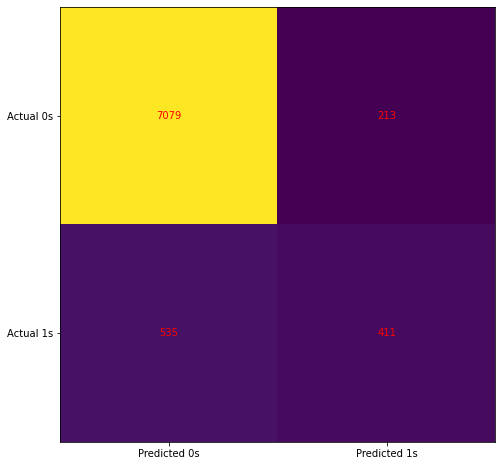

In [22]:
pred_y_lg = tuned_lg.predict(lg_test_x)
print("model accuracy score: ")
print(tuned_lg.score(lg_test_x, lg_test_y))

#confusion matrix
cm = confusion_matrix(lg_test_y, pred_y_lg)

  #matplotlib way
fig, ax = plot.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plot.show

In [23]:
#seaborn way
'''
ax = sns.heatmap(cm, annot = True, cmap = 'Blues')
ax.set_title('confusion matirx\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
#tick labels
ax.xaxis.set_ticklabels(['0&NO','1&YES'])
ax.yaxis.set_ticklabels(['0&NO','1&YES'])
plot.show
'''

"\nax = sns.heatmap(cm, annot = True, cmap = 'Blues')\nax.set_title('confusion matirx\n\n');\nax.set_xlabel('\nPredicted Values')\nax.set_ylabel('Actual Values ');\n#tick labels\nax.xaxis.set_ticklabels(['0&NO','1&YES'])\nax.yaxis.set_ticklabels(['0&NO','1&YES'])\nplot.show\n"

### 3.2 random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=2)
param_grid = {
    'n_estimators': [78,79,80,81,82,83], 
    'max_depth':[12,13,14,15,16,17,18], 
    'max_features': ['sqrt', 'log2']
    }
rf_clf=GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_clf.fit(model_train_x,model_train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [12, 13, 14, 15, 16, 17, 18],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [78, 79, 80, 81, 82, 83]})

the best parameter for max_depth is: 15
the best parameter for n_estimators is: 78


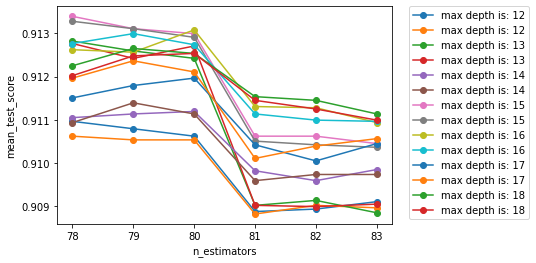

In [46]:
result = rf_clf.cv_results_
#print(result)
max_depth = [12,13,14,15,16,17,18]
n_estimators = [78,79,80,81,82,83]
max_features = ['sqrt', 'log2']
scores = result['mean_test_score'].reshape(len(max_depth),len(n_estimators), len(max_features))
#scores
plot.figure()
plot.subplot(1,1,1)
for i,j in enumerate(max_depth):
  plot.plot(n_estimators, scores[i], '-o', label = 'max depth is: ' + str(j))
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plot.xlabel('n_estimators')
plot.ylabel('mean_test_score')
plot.show
print('the best parameter for max_depth is: '+str(rf_clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(rf_clf.best_params_['n_estimators']))

In [47]:
tuned_rf = RandomForestRegressor(n_estimators = rf_clf.best_params_['n_estimators'], max_depth = rf_clf.best_params_['max_depth'], max_features = rf_clf.best_params_['max_features'])
tuned_rf.fit(model_train_x,model_train_y)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=78)



> finding the best threshold



In [50]:
from sklearn.metrics import accuracy_score
pred_y_rf = tuned_rf.predict(model_test_x)


threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in threshold:
  predicted = (pred_y_rf[:] < i).astype('int')
  print("threshold = ", i, "and accuracy = ", accuracy_score(model_test_y, predicted))


pred_y_rf = (pred_y_rf[:] < 0.1).astype('int')

threshold =  0.1 and accuracy =  0.15763068457679236
threshold =  0.2 and accuracy =  0.11684738630846415
threshold =  0.3 and accuracy =  0.09483735232238226
threshold =  0.4 and accuracy =  0.08609807412202622
threshold =  0.5 and accuracy =  0.08901116685547823
threshold =  0.6 and accuracy =  0.0937044829260398
threshold =  0.7 and accuracy =  0.09855963748179317
threshold =  0.8 and accuracy =  0.10325295355235475
threshold =  0.9 and accuracy =  0.10891730053406701


R squared score: 
0.40696518840974016


<function matplotlib.pyplot.show(close=None, block=None)>

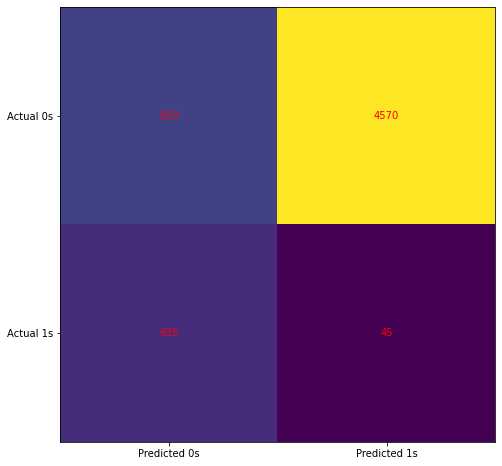

In [52]:
print("R squared score: ")
print(tuned_rf.score(model_test_x, model_test_y))

#confusion matrix
cm = confusion_matrix(model_test_y, pred_y_rf)

#seaborn confusion matrix
fig, ax = plot.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plot.show

**based on the confusion matrix from Random forest, it is obvious that random forest have a strong type 1 error.**

## PART 4: model evaluation


Here, I will be examing the


*   accuracy score
*   True positive rate
*   False positive rate
*   precision
*   area under the curve

of each tuned model

**R-squared** is a statistical measure that indicates how well the model fits the data. It represents the proportion of variance in the dependent variable that is explained by the independent variables. it is a scale from 0 - 1. the  closer to 1 it gets, the better predicting power the model have, and vice versa.

**True positive rate** represents the proportion of true positives that were correctly classified by the model, out of all the positive cases in the dataset. 

> *Formula :TPR = TP / (TP + FN)*

**False positive rate** represents the proportion of negative cases that were incorrectly classified as positive by the model, out of all the negative cases in the dataset.

> *Formula :FPR = FP / (FP + TN)*

**precision** represents the proportion of predicted positive instances that were actually positive, out of all the instances predicted as positive by the model.
> *Formula :Precision = TP / (TP + FP)*

**AUC(area under the curve) & ROC(Receiver Operating Characteristic)** The ROC curve provides a graphical representation of the trade-off between TPR and FPR for different threshold values, and the AUC provides a single number that summarizes the overall performance of the model across all possible thresholds.

In [53]:
train_x = model_train_x
train_y = model_train_y
test_x = model_test_x
test_y = model_test_y



### 4.1 for Random Forest










In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=rf_clf.best_params_['n_estimators'], 
                           max_depth= rf_clf.best_params_['max_depth'],
                           max_features= rf_clf.best_params_['max_features'],
                           random_state= 2,
                           n_jobs = -1)
rf.fit(train_x, train_y)
pred_y_rf = rf.predict(test_x)


In [57]:
# True Positive
TP = np.sum(np.logical_and(pred_y_rf == 1, test_y == 1))
#True Negative
TN = np.sum(np.logical_and(pred_y_rf == 0, test_y == 0))
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(pred_y_rf == 1, test_y == 0))
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(pred_y_rf == 0, test_y == 1))



#accuracy score
rf_score = rf.score(test_x, test_y)

#true positive rate
TPR_rf = TP/(TP+FN)

#false positive  rate
FPR_rf = FP/(FP + TN)

#precision
precision_rf = TP / (TP + FP)


print('R squared score: ', rf_score)
print('true positive rate: ', TPR_rf)
print('false positive  rate: ', FPR_rf)
print('precision: ', precision_rf)

R squared score:  0.9113125101149053
true positive rate:  0.3985294117647059
false positive  rate:  0.025277323149663574
precision:  0.6609756097560976




### 4.2 for Logistic Regression



In [58]:
logis = LogisticRegression(penalty = lg_clf.best_params_['penalty'], 
                              C = lg_clf.best_params_['C'], 
                              solver = lg_clf.best_params_['solver'])
logis.fit(model_train_x, model_train_y)
pred_y_lr = logis.predict(model_test_x)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [59]:
# True Positive
TP = np.sum(np.logical_and(pred_y_lr == 1, test_y == 1))
#True Negative
TN = np.sum(np.logical_and(pred_y_lr == 0, test_y == 0))
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(pred_y_lr == 1, test_y == 0))
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(pred_y_lr == 0, test_y == 1))

#accuracy score
LR_score = logis.score(model_test_x, test_y)

#true positive rate
TPR_lg = TP/(TP+FN)

#false positive  rate
FPR_lg = FP/(FP + TN)

#precision
precision_lg = TP / (TP + FP)

print('R squared score: ', LR_score)
print('true positive rate: ', TPR_lg)
print('false positive  rate: ', FPR_lg)
print('precision: ', precision_lg)

R squared score:  0.9103414792037546
true positive rate:  0.4279411764705882
false positive  rate:  0.03000545553737043
precision:  0.6381578947368421


### 4.3 grpah coomparsion between logistic regression and random forest
1.   accuracy score 
2.   true positive rate
3.   false positive rate
4.   precision
5.   AUC & ROC


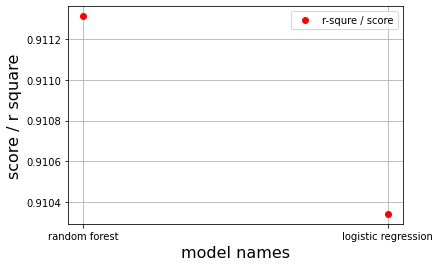

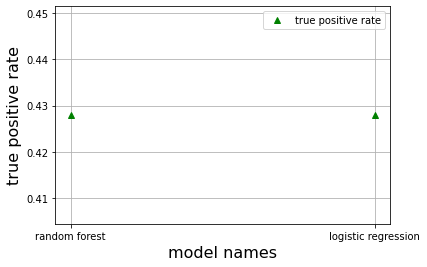

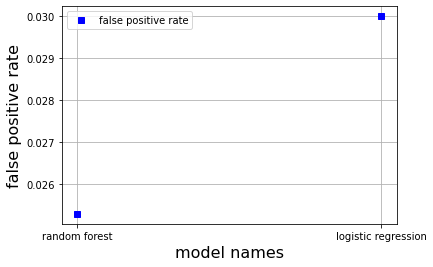

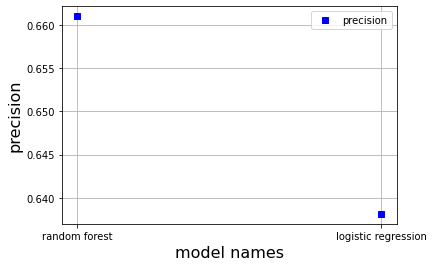

In [60]:
accuracy_score = [rf_score, LR_score]
true_positive_rate = [TPR_lg, TPR_lg]
false_positive_rate = [FPR_rf, FPR_lg]
precision= [precision_rf, precision_lg]
MODELS = ['random forest', 'logistic regression']

plot.figure(1)
plot.plot(MODELS, accuracy_score, 'ro')
plot.legend(['r-squre / score'])
plot.xlabel('model names',fontsize =16)
plot.ylabel('score / r square', fontsize =16)
plot.grid(True)
plot.show()

plot.figure(2)
plot.plot(MODELS, true_positive_rate, 'g^')
plot.legend(['true positive rate'])
plot.xlabel('model names', fontsize =16)
plot.ylabel('true positive rate', fontsize =16)
plot.grid(True)
plot.show()

plot.figure(3)
plot.plot(MODELS, false_positive_rate, 'bs')
plot.legend(['false positive rate'])
plot.xlabel('model names', fontsize =16)
plot.ylabel('false positive rate', fontsize =16)
plot.grid(True)
plot.show()

plot.figure(4)
plot.plot(MODELS, precision, 'bs')
plot.legend(['precision'])
plot.xlabel('model names', fontsize =16)
plot.ylabel('precision', fontsize =16)
plot.grid(True)
plot.show()



> ROC curve



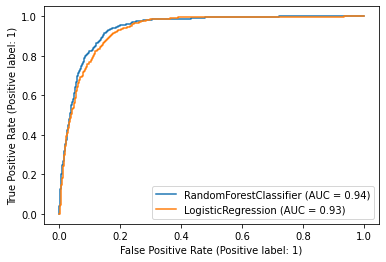

In [61]:
from sklearn.metrics import RocCurveDisplay
ax = plot.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf, test_x, test_y, ax=ax)
lgr_disp = RocCurveDisplay.from_estimator(logis, test_x, test_y, ax=ax)
plot.show()



---





---


performance comparsion table 
<table>
  <tr>
    <th>model</th>
    <th>R-squared</th>
    <th>True positive</th>
    <th>False positive</th>
    <th>precision</th>
    <th>AUC & ROC</th>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td><b>0.9113125101149053</b></td>
    <td>0.3985294117647059</td>
    <td><b>0.025277323149663574</b></td>
    <td><b>0.6609756097560976</td>
    <td><b>0.94</td>
  </tr>
  <tr>
    <td>logistic regression</td>
    <td>0.9103414792037546</td>
    <td><b>0.4279411764705882</b></td>
    <td>0.03000545553737043</td>
    <td>0.6381578947368421</td>
    <td>0.93</td>
  </tr>
</table> 



**based on the performance  comparsion table above, I can conclude that random forest is a better classification algorithem to use** 